### Demonstration of property estimation for protein sequence datasets

This notebook facilitates the characterization (physicochemical properties and amino acid frequency) for a collected dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

- Loading libraries

In [1]:
import sys
sys.path.insert(0, "../src/")

In [8]:
import pandas as pd
import seaborn as sns
from feature_description.process_properties import ProteinDescriptors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rc('font', size=10)

- Processing data for antimicrobial dataset

In this case, only the training dataset is employed as input for demonstrative case

In [5]:
df_antimicrobial = pd.read_csv("../raw_data/Antimicrobial/train_data.csv")
property_estimation = ProteinDescriptors(dataset=df_antimicrobial, column_seq="sequence")
property_estimation.apply_physicochemical_properties()
property_estimation.dataset = property_estimation.dataset.drop(columns=["sequence"])
property_estimation.dataset.to_csv("../processed_dataset/antimicrobial/described_dataset.csv", index=False)

In [6]:
property_estimation.dataset.head()

,label,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,Aromaticity,Aliphatic index,Boman index,Hydrophobic ratio,...,freq_L,freq_M,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
0,0,1599.84,3.6875,-0.00142,-2.271,80.3800,0.0000,78.0000,1.0227,0.5333,...,0.0667,0.0000,0.0000,0.0667,0.0000,0.0000,0.0667,0.0667,0.0,0.0000
1,0,5854.58,11.8838,0.00087,5.094,28.6796,0.0741,67.0370,1.7772,0.3704,...,0.0741,0.0370,0.0370,0.0926,0.0556,0.0926,0.1111,0.0370,0.0,0.0185
2,1,1599.84,11.1055,0.00250,3.997,8.1400,0.0000,58.6667,3.2153,0.2667,...,0.0667,0.0000,0.0000,0.0000,0.0667,0.0667,0.0000,0.0667,0.0,0.0000
3,1,1432.67,3.9297,-0.00070,-1.003,3.2214,0.0714,167.1429,-1.0714,0.7143,...,0.1429,0.0000,0.0000,0.0000,0.0000,0.0000,0.0714,0.2857,0.0,0.0714
4,0,4971.40,4.6431,-0.00056,-2.801,100.1833,0.0208,68.9583,1.4767,0.2708,...,0.0208,0.0208,0.1042,0.0417,0.0000,0.2708,0.1250,0.0833,0.0,0.0000


In [9]:
property_estimation.dataset.columns

Index(['label', 'Molecular Weight', 'Isoelectric point', 'Charge density',
       'Charge', 'Instability index', 'Aromaticity', 'Aliphatic index',
       'Boman index', 'Hydrophobic ratio', 'freq_A', 'freq_C', 'freq_D',
       'freq_E', 'freq_F', 'freq_G', 'freq_H', 'freq_I', 'freq_N', 'freq_K',
       'freq_L', 'freq_M', 'freq_P', 'freq_Q', 'freq_R', 'freq_S', 'freq_T',
       'freq_V', 'freq_W', 'freq_Y'],
      dtype='object')

- We can plot the distributions and check if are there some differences between antimicrobial and non antimicrobial data

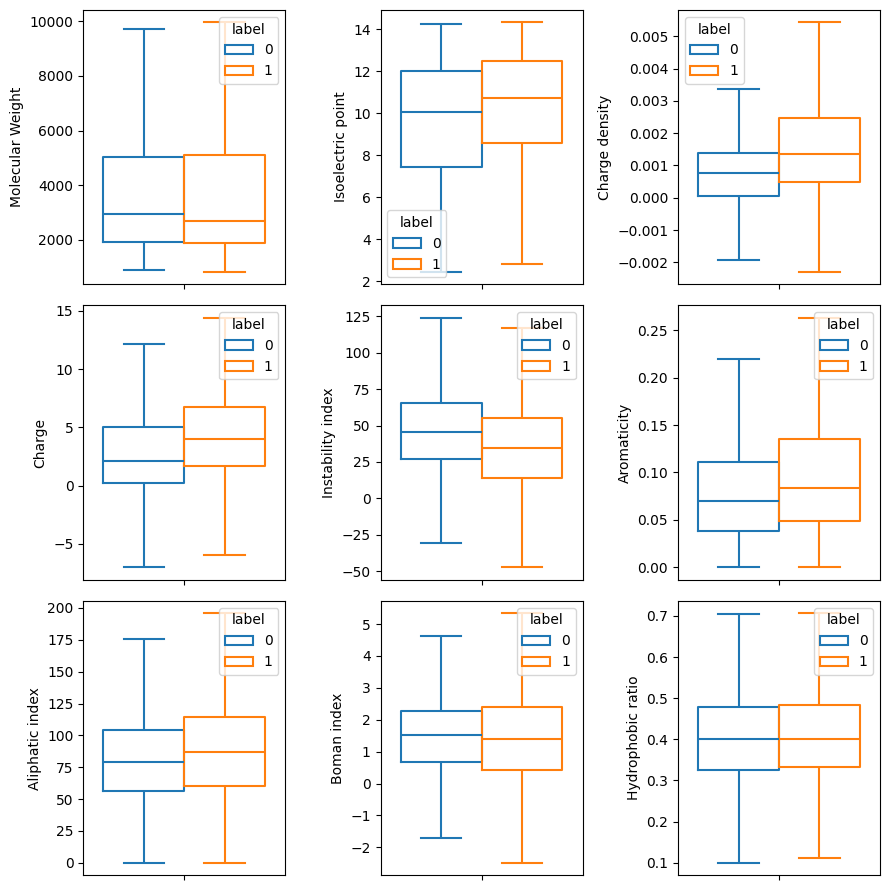

In [11]:
fig = plt.figure(figsize=(9, 9))
gs = GridSpec(3, 3, figure=fig)

columns_to_plot = ['Molecular Weight', 'Isoelectric point', 'Charge density',
       'Charge', 'Instability index', 'Aromaticity', 'Aliphatic index',
       'Boman index', 'Hydrophobic ratio']

index=0

for i in range(3):
    for j in range(3):
        ax_data = fig.add_subplot(gs[i, j])
        sns.boxplot(
            ax=ax_data, 
            data=property_estimation.dataset, 
            y=columns_to_plot[index],
            fill=False,
            showfliers=False,
            hue="label")
        index+=1

plt.tight_layout()


- Processing Regression dataset

In [12]:
df_protein_solubility = pd.read_csv("../raw_data/protein_solubility/train_data.csv")
property_estimation = ProteinDescriptors(dataset=df_protein_solubility, column_seq="sequence")
property_estimation.apply_physicochemical_properties()
property_estimation.dataset = property_estimation.dataset.drop(columns=["sequence"])
property_estimation.dataset.to_csv("../processed_dataset/protein_solubility/described_dataset.csv", index=False)